In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from utils import price_to_float

%matplotlib inline

In [182]:
# df = pd.read_csv('PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv', keep_default_na=False)
df = pd.read_csv('PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv', parse_dates=["Creation Date", "Purchase Date"])

In [273]:
df.head(5)

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,Supplier Name,Supplier Qualifications,Supplier Zip Code,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,2013-08-27,NaT,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,NaN,WSCA/Coop,NaN,"Consumer Affairs, Department of",1740272.0,Pitney Bowes,NaN,NaN,NO,USB,USB,1.0,$1.00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-29,NaT,2013-2014,NaN,REQ0011932,REQ0011932,NON-IT Goods,NaN,Informal Competitive,NaN,"Consumer Affairs, Department of",1760085.0,Rodea Auto Tech,NaN,NaN,NO,Tire Disposal,Tire Disposal,2.0,$2.00,$4.00,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-01,NaT,2013-2014,NaN,REQ0011476,REQ0011476,IT Services,NaN,Informal Competitive,NaN,"Consumer Affairs, Department of",17224.0,"Smile Business Products, Inc",NaN,95841,NO,Labor,Labor,4.5,$150.00,$675.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,2014-06-13,2014-06-05,2013-2014,NaN,4500236642,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,Correctional Health Care Services,1754462.0,ASHAN INC,CA-MB CA-SB,91436,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,2014-03-12,2014-03-12,2013-2014,1-10-75-60A,4500221028,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,"Corrections and Rehabilitation, Department of",1087660.0,Technology Integration Group,NaN,95814,NO,Toner,Toner,1.0,$6080.26,$6080.26,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Creation Date            346018 non-null  datetime64[ns]
 1   Purchase Date            328582 non-null  object        
 2   Fiscal Year              346018 non-null  object        
 3   LPA Number               92345 non-null   object        
 4   Purchase Order Number    346018 non-null  object        
 5   Requisition Number       14369 non-null   object        
 6   Acquisition Type         346018 non-null  object        
 7   Sub-Acquisition Type     68337 non-null   object        
 8   Acquisition Method       346018 non-null  object        
 9   Sub-Acquisition Method   30896 non-null   object        
 10  Department Name          346018 non-null  object        
 11  Supplier Code            345982 non-null  float64       
 12  Supplier Name   

In [35]:
df.describe()

,Supplier Code,Quantity,Normalized UNSPSC,Class,Family,Segment
count,3.459820e+05,3.459880e+05,3.450010e+05,3.427230e+05,3.427230e+05,3.427230e+05
mean,8.434345e+05,2.316154e+03,4.932197e+07,4.927633e+07,4.927219e+07,4.913283e+07
std,2.461186e+06,1.058259e+05,2.246967e+07,2.246105e+07,2.246430e+07,2.246636e+07
min,0.000000e+00,1.000000e-04,3.018170e+05,1.010150e+07,3.018000e+06,1.000000e+07
25%,2.729200e+04,1.000000e+00,3.911171e+07,3.911160e+07,3.911000e+07,3.900000e+07
50%,1.012531e+06,1.000000e+00,4.412160e+07,4.412150e+07,4.412000e+07,4.400000e+07
75%,1.482180e+06,6.000000e+00,7.210151e+07,7.116110e+07,7.116000e+07,7.100000e+07
max,9.548318e+08,2.000000e+07,9.514190e+07,9.514190e+07,9.514000e+07,9.500000e+07


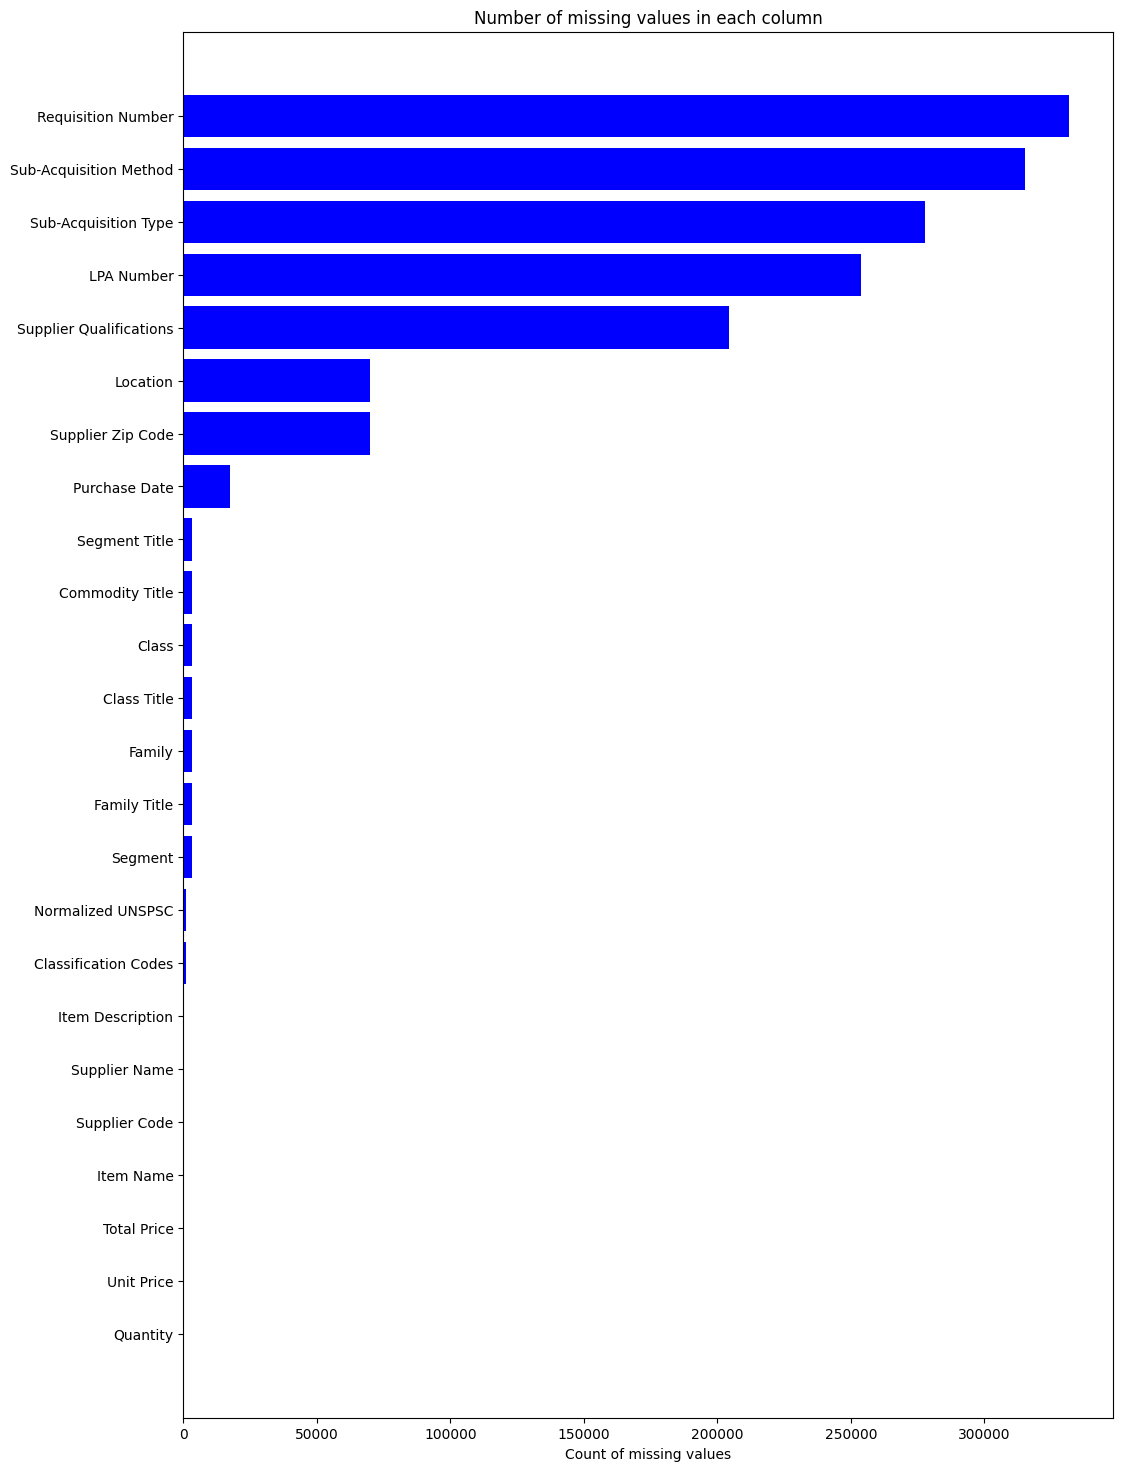

In [44]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [80]:
def histogram(df, name, bins=50, filter_nan=True, parser=None):
    if filter_nan:
        missing_df = df.isnull()
        n_missing = missing_df[name].sum()
        if n_missing > 0:
            print(f'{n_missing}/{df.shape[0]} missing values for column: {name}')
            df = df[missing_df[name] == False]
            print(df.shape)
    if parser:
        df[name] = parser(df[name])
    plt.hist(df[name], bins=bins, edgecolor='black')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title(f'{name} Histogram')
    plt.xticks(fontsize=10, rotation=90)
    plt.show()

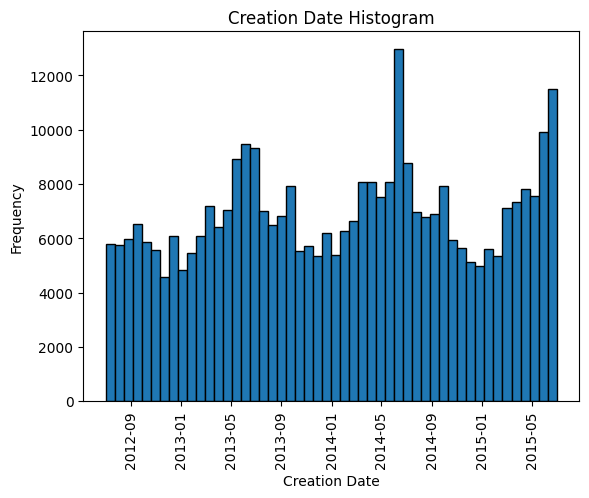

In [79]:
histogram(df, 'Creation Date')

In [188]:
# erroneous purchase dates
err_dates = []
for date_str in df[df['Purchase Date'].isnull()==False]['Purchase Date']:
    entry_date = datetime.strptime(date_str, '%m/%d/%Y')
    if entry_date.year < 1990 or entry_date.year > 2025:
        err_dates.append(date_str)

err_condition = df['Purchase Date'] == err_dates[0]
for err_date in err_dates[1:]:
    err_condition |= df['Purchase Date'] == err_date
df[err_condition]

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,Supplier Name,Supplier Qualifications,Supplier Zip Code,CalCard,Item Name,Item Description,Quantity,Unit Price,Total Price,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
736,2012-08-08,08/08/1912,2012-2013,NaN,S2869003,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,"Parks & Recreation, Department of",1027255.0,Hayward Lumber & Home Supply,NaN,93455,NO,Nails,Nails,1.0,$64.98,$64.98,31162002,31162002.0,Cap nails,31162000.0,Nails,31160000.0,Hardware,31000000.0,Manufacturing Components and Supplies,"93455\n(34.86075, -120.416107)"
906,2012-08-08,08/08/1912,2012-2013,NaN,S2869003,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,"Parks & Recreation, Department of",1027255.0,Hayward Lumber & Home Supply,NaN,93455,NO,brackets,Simpson Brackets,150.0,$0.38,$57.00,31162501,31162501.0,Shelf brackets,31162500.0,Brackets and braces,31160000.0,Hardware,31000000.0,Manufacturing Components and Supplies,"93455\n(34.86075, -120.416107)"
6451,2012-07-18,10/30/2510,2012-2013,7-11-51-01,4500187140,NaN,NON-IT Goods,NaN,WSCA/Coop,NaN,"Water Resources, Department of",1013057.0,Fastenal,NaN,90640,NO,Facilities Maintenance,Facilities Maintenance,1.0,$9694.70,$9694.70,20122503,20122503.0,Coiled tubing units,20122500.0,Coiled tubing equipment,20120000.0,Oil and gas drilling and exploration equipment,20000000.0,Mining and Well Drilling Machinery and Accesso...,"90640\n(34.01573, -118.113367)"
8707,2012-07-03,10/12/2729,2012-2013,NaN,5600003231,NaN,NON-IT Services,Personal Services,Formal Competitive,NaN,"Corrections and Rehabilitation, Department of",1743557.0,Weingart Center,NaN,NaN,NO,Residential Multi Serivcer Center- Los Angeles...,"The RMSC will provide housing, substance abuse...",1.0,$3720214.03,$3720214.03,60105426\n86101810\n86111602\n85122103,60105426.0,Responsibility or Ddecision making skills inst...,60105400.0,Consumer economics and money management and in...,60100000.0,Developmental and professional teaching aids a...,60000000.0,Musical Instruments and Games and Toys and Art...,NaN
11590,2012-08-08,08/08/1912,2012-2013,NaN,S2869003,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,"Parks & Recreation, Department of",1027255.0,Hayward Lumber & Home Supply,NaN,93455,NO,Redwood,Redwood,210.0,$84.00,$17640.00,30103603,30103603.0,Framing lumber,30103600.0,Structural products,30100000.0,Structural components and basic shapes,30000000.0,Structures and Building and Construction and M...,"93455\n(34.86075, -120.416107)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328349,2014-04-07,03/31/3072,2013-2014,NaN,M494010,NaN,NON-IT Services,Personal Services,Services are specifically exempt by statute,NaN,Employment Development Department,1086741.0,Broadway Spring Center,NaN,90013,NO,parking space rental,parking space rental,1.0,$12700.00,$12700.00,78111807,78111807.0,Parking fees,78111800.0,Passenger road transportation,78110000.0,Passenger transport,78000000.0,Transportation and Storage and Mail Services,"90013\n(34.04469, -118.241599)"
328631,2012-08-08,08/08/1912,2012-2013,NaN,S2869003,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,"Parks & Recreation, Department of",1027255.0,Hayward Lumber & Home Supply,NaN,93455,NO,Bracket,Bracket,28.0,$27.98,$783.44,31162506,31162506.0,Wall mount bracket,31162500.0,Brackets and braces,31160000.0,Hardware,31000000.0,Manufacturing Components and Supplies,"93455\n(34.86075, -120.416107)"
339926,2014-05-29,11/01/2813,2013-2014,NaN,CBT13017,NaN,IT Goods,NaN,NCB,A single firm services a geographic region,"Education, Department of",1015837.0,HUMANWARE,NaN,94520,NO,Oxford Dictionary & Thesaurs,Oxford Dictionary & Thesaurus,1.0,$169.15,$169.15,43232507,43232507.0,Dictionary soft

In [192]:
df['Purchase Date'] = pd.to_datetime([date[:-4]+'20'+date[-2:] if type(date) != float else date for date in df['Purchase Date'].values])

17436/346018 missing values for column: Purchase Date
(328582, 31)


/var/folders/7w/gkxkn5vs7t3_lv3qlp7c094h0000gn/T/ipykernel_20250/4271015213.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = parser(df[name])


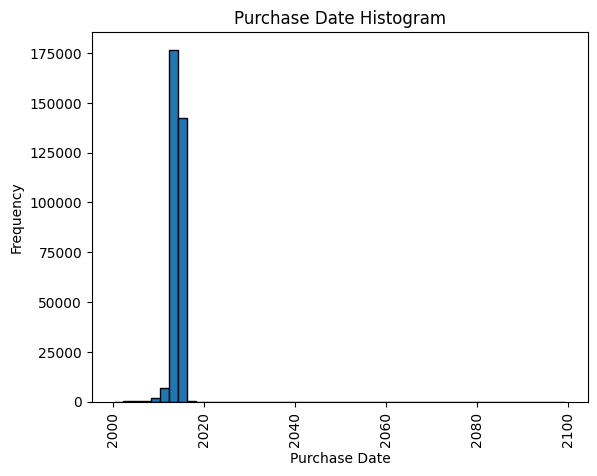

In [193]:
def to_datetime(inputs):
    return pd.to_datetime(inputs, format='%m/%d/%Y')
histogram(df, 'Purchase Date', parser=to_datetime)

In [274]:
df['Purchase Date'].value_counts()

2014-07-01    4500
2013-07-01    4463
2015-07-01    2757
2012-07-01    2221
2013-05-01    1221
              ... 
2008-06-23       1
2097-02-01       1
2005-06-28       1
2018-09-16       1
2021-06-06       1
Name: Purchase Date, Length: 2207, dtype: int64

In [194]:
df['Fiscal Year'].value_counts()

2013-2014    120636
2014-2015    116537
2012-2013    108845
Name: Fiscal Year, dtype: int64

In [195]:
df['LPA Number'].value_counts()

7-11-51-02         9267
1-10-75-60A        3763
1-12-65-65-01-E    3717
1-11-70-04O        3097
1-13-70-02A        2612
                   ... 
1-14-65-54-A          1
5137002-047           1
3-11-70-0255Y         1
5137002-127           1
3-12-70-0040AR        1
Name: LPA Number, Length: 1420, dtype: int64

In [196]:
df['Purchase Order Number'].value_counts()

4500211314    602
4500201426    579
4500203794    578
4500204899    578
4500202454    564
             ... 
A9-1314-29      1
4500233137      1
4500233243      1
4500233121      1
2ui3L262        1
Name: Purchase Order Number, Length: 200533, dtype: int64

In [197]:
df['Requisition Number'].value_counts()

REQ0008872    123
REQ0010655     81
REQ0009177     65
REQ0010201     62
REQ0008985     59
             ... 
REQ0013764      1
REQ0013852      1
REQ0013625      1
REQ0013811      1
REQ0010019      1
Name: Requisition Number, Length: 5997, dtype: int64

In [198]:
df['Acquisition Type'].value_counts()

NON-IT Goods             215083
NON-IT Services           68372
IT Goods                  50900
IT Services               11516
IT Telecommunications       147
Name: Acquisition Type, dtype: int64

In [199]:
df['Sub-Acquisition Type'].value_counts()

Personal Services                                                      16104
Services are specifically exempt by statute                            11854
Emergency Contract                                                      7913
Subvention and Local Assistance                                         7048
Public Works                                                            4791
Expert Witneses                                                         3800
Interagency Agreements                                                  3261
Agreements with other governmental entities and public universities     2051
Architectural and Engineering                                           1785
Contracts with Local Governments                                        1562
Nonprofit Organizations                                                 1345
Printing Services                                                       1246
Legal Services                                                          1167

In [200]:
df['Acquisition Method'].value_counts()

Informal Competitive                           82083
Statewide Contract                             63488
SB/DVBE Option                                 38500
Services are specifically exempt by statute    33045
State Programs                                 27842
Fair and Reasonable                            25400
WSCA/Coop                                      19478
Formal Competitive                             18479
Services are specifically exempt by policy     11302
Emergency Purchase                             10186
NCB                                             4439
CMAS                                            3514
Master Service Agreement                        2309
Software License Program                        1949
Master Purchase/Price Agreement                 1528
CRP                                              685
Special Category Request (SCR)                   677
Statement of Qualifications                      547
LCB                                           

In [201]:
df['Sub-Acquisition Method'].value_counts()

Fleet                                                         14148
Prison Industry Authority (PIA)                               11602
Only goods and services that meet needs of the State           1810
Office of State Printing (OSP)                                  812
Interagency Agreement                                           565
Services are specifically exempt by statute                     521
Other                                                           503
Emergency acquisition for the protection of the public          334
A single firm services a geographic region                      328
Contract with other government agency                           117
SB/DVBE Option                                                   83
Subvention contracts with private/non-profit entity/agency       28
Legal defense advice or services by an attorney or staff         18
Master Service Agreement                                         15
Transportation Management Unit (TMU)            

In [202]:
df['Department Name'].value_counts()

Corrections and Rehabilitation, Department of    57537
Correctional Health Care Services                32250
Water Resources, Department of                   28331
Forestry and Fire Protection, Department of      23244
State Hospitals, Department of                   18968
                                                 ...  
Building Standards Commission                        2
CA Commission on Disability Access                   2
Citizens Redistricting Commission                    1
California Natural Resources Agency                  1
State and Consumer Services Agency                   1
Name: Department Name, Length: 111, dtype: int64

In [203]:
df['Supplier Code'].value_counts()

1743406.0    13756
1001584.0     9441
1065902.0     8508
1008361.0     6991
1087660.0     6709
             ...  
1754487.0        1
1784194.0        1
10116.0          1
1784296.0        1
1189245.0        1
Name: Supplier Code, Length: 25239, dtype: int64

In [204]:
df['Supplier Name'].value_counts()

Voyager Fleet Systems Inc         13756
Grainger Industrial Supply         9441
Prison Industry Authority          8979
3B INDUSTRIES INC                  6991
Technology Integration Group       6817
                                  ...  
Daniela Hernandez                     1
Julie Jeffray                         1
Padra Nourparvar                      1
Veronica Chavez                       1
Procare Janitorial Supply, INC        1
Name: Supplier Name, Length: 24732, dtype: int64

In [205]:
df['Supplier Qualifications'].value_counts()

CA-MB CA-SB                        53077
CA-SB                              33221
CA-MB CA-SB CA-SBE                  7744
CA-DVBE CA-MB CA-SB                 5661
CA-SB CA-SBE                        5630
                                   ...  
CA-SB CA-SBE DBE SB WBE WOSB           1
CA-SB CA-SBE CDVBE DBE MOSB SB         1
CA-MB CA-SB DBE MBE SB WBE WOSB        1
CA-SBE DBE MBE SB                      1
CA-MB CA-SB MBE MOSB WBE WOSB          1
Name: Supplier Qualifications, Length: 278, dtype: int64

In [206]:
df['Supplier Zip Code'].value_counts()

95691         11095
95814         10921
95696          8518
95827          7159
95841          7008
              ...  
08807-0911        1
55416             1
91367-6583        1
21030             1
94567             1
Name: Supplier Zip Code, Length: 3993, dtype: int64

In [207]:
df['CalCard'].value_counts()

NO     340646
YES      5372
Name: CalCard, dtype: int64

In [208]:
df['Item Name'].value_counts()

Medical Supplies                                            2916
Contract                                                    2092
ew                                                          1539
Expert Witness                                              1317
medical vocational training                                 1092
                                                            ... 
In-Custody substance abuse treatment programs (region I)       1
Plaster Molds                                                  1
TrendMicro Portal Protection Software Support                  1
Avocado 70/CS                                                  1
LOCAL GOVERNMENT-LABOR                                         1
Name: Item Name, Length: 180030, dtype: int64

In [209]:
df['Item Description'].value_counts()

confidential                            1637
Medical Supplies                        1390
medical vocational training             1084
medical training                         857
vest                                     780
                                        ... 
Emergency Vehicle Detection                1
BOOT,RUBBER,STEEL TOE,MUCK,SIZE 9-11       1
soft cases for aed machines                1
lactated rings                             1
Dremel 120 Volt Engraver                   1
Name: Item Description, Length: 219509, dtype: int64

In [210]:
df['Quantity'].value_counts()

1.00        214019
2.00         18383
4.00          8794
3.00          8288
10.00         7053
             ...  
24952.00         1
217.50           1
2010.00          1
3030.24          1
80.40            1
Name: Quantity, Length: 6131, dtype: int64

In [211]:
df['Unit Price'].value_counts()

$0.00        7552
$1.00        3616
$10000.00    2205
$50000.00    1222
$4.00        1139
             ... 
$6702.66        1
$11352.35       1
$21949.59       1
$2073.96        1
$17455.91       1
Name: Unit Price, Length: 128167, dtype: int64

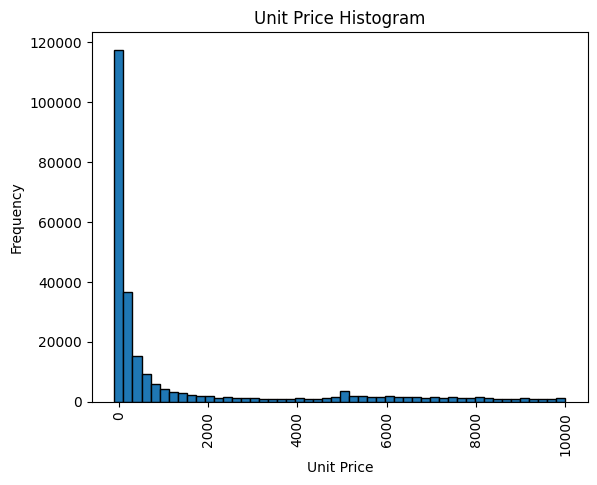

In [307]:
df['Unit Price'] = df['Unit Price'].apply(price_to_float)
histogram(df[(df['Unit Price']>-100)&(df['Unit Price']<10000)], 'Unit Price')

In [212]:
df['Total Price'].value_counts()

$0.00        7519
$10000.00    2290
$50000.00    1261
$15000.00    1150
$20000.00    1005
             ... 
$21646.26       1
$2905.21        1
$5668.70        1
$10392.60       1
$17455.91       1
Name: Total Price, Length: 150305, dtype: int64

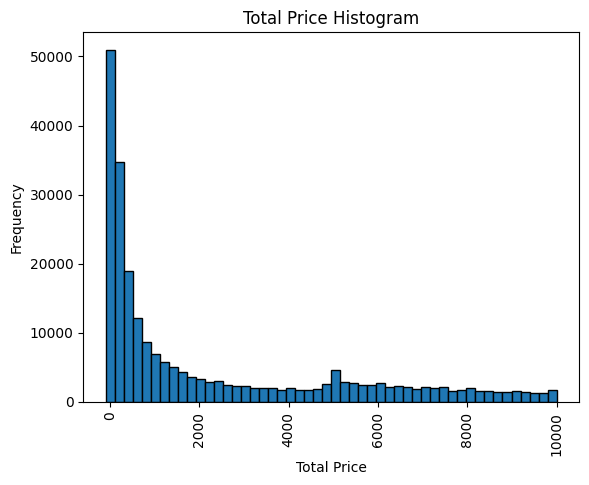

In [290]:
df['Total Price'] = df['Total Price'].apply(price_to_float)
histogram(df[(df['Total Price']>-100)&(df['Total Price']<10000)], 'Total Price')

In [286]:
(df['Total Price'] > 10000000000).sum()

0

In [213]:
df['Classification Codes'].value_counts()

15101506                                                                                                                                                                    12679
44103103                                                                                                                                                                     6905
86101605                                                                                                                                                                     4769
85101705                                                                                                                                                                     4198
80121903                                                                                                                                                                     3622
                                                                                                              

In [214]:
df['Normalized UNSPSC'].value_counts()

15101506.0    12776
44103103.0     7274
86101605.0     4783
85101705.0     4204
81112201.0     3745
              ...  
46182102.0        1
50401820.0        1
25201605.0        1
12181602.0        1
41123006.0        1
Name: Normalized UNSPSC, Length: 13553, dtype: int64

In [215]:
df['Commodity Title'].value_counts()

Gasoline or Petrol                       12776
Printer or facsimile toner                7274
Medical vocational training services      4783
Public health administration              4204
Maintenance or support fees               3745
                                         ...  
Addressing machines                          1
Beach towels                                 1
Laboratory X ray equipment controller        1
Flurbiprofen                                 1
Cement floating equipment stage tools        1
Name: Commodity Title, Length: 13220, dtype: int64

In [216]:
df['Class'].value_counts()

15101500.0    14584
44103100.0     9457
14111500.0     7190
81112200.0     7026
43211500.0     6974
              ...  
10323200.0        1
81161600.0        1
83112500.0        1
86131600.0        1
41123100.0        1
Name: Class, Length: 2363, dtype: int64

In [217]:
df['Class Title'].value_counts()

Petroleum and distillates                         14584
Printer and facsimile and photocopier supplies     9457
Printing and writing paper                         7190
Software maintenance and support                   7026
Computers                                          6974
                                                  ...  
Multilateral equipment                                1
Dried organic lentils                                 1
Industrial drilling tools                             1
Mud removal mixtures                                  1
Laboratory dialysis supplies                          1
Name: Class Title, Length: 2360, dtype: int64

In [218]:
df['Family'].value_counts()

44100000.0    16479
15100000.0    14599
81110000.0    13946
43210000.0    13851
14110000.0    10772
              ...  
31290000.0        1
10230000.0        1
31340000.0        1
11180000.0        1
31110000.0        1
Name: Family, Length: 409, dtype: int64

In [219]:
df['Family Title'].value_counts()

Office machines and their supplies and accessories    16479
Fuels                                                 14599
Computer services                                     13946
Computer Equipment and Accessories                    13851
Paper products                                        10772
                                                      ...  
Fabricated sheet assemblies                               1
Machined extrusions                                       1
Live chrysanthemums                                       1
Metal oxide                                               1
Extrusions                                                1
Name: Family Title, Length: 411, dtype: int64

In [220]:
df['Segment'].value_counts()

43000000.0    32681
50000000.0    27875
44000000.0    27745
81000000.0    17350
42000000.0    16491
15000000.0    16029
14000000.0    11235
25000000.0    10965
86000000.0    10643
46000000.0    10196
80000000.0     9532
85000000.0     7977
56000000.0     7521
41000000.0     6998
76000000.0     6700
30000000.0     6603
72000000.0     6529
26000000.0     6493
24000000.0     5844
78000000.0     5740
39000000.0     5725
93000000.0     5724
31000000.0     5459
55000000.0     5276
40000000.0     5164
53000000.0     4726
47000000.0     4362
60000000.0     4042
52000000.0     3665
27000000.0     3639
10000000.0     3299
20000000.0     3060
23000000.0     2920
73000000.0     2724
12000000.0     2402
82000000.0     2387
45000000.0     2274
11000000.0     2203
92000000.0     2168
70000000.0     2082
32000000.0     2042
83000000.0     1733
48000000.0     1658
90000000.0     1515
77000000.0     1449
22000000.0     1372
51000000.0     1363
49000000.0     1261
84000000.0     1236
71000000.0     1051


In [221]:
df['Segment Title'].value_counts()

Information Technology Broadcasting and Telecommunications                                                                         32681
Food Beverage and Tobacco Products                                                                                                 27875
Office Equipment and Accessories and Supplies                                                                                      27745
Engineering and Research and Technology Based Services                                                                             17350
Medical Equipment and Accessories and Supplies                                                                                     16491
Fuels and Fuel Additives and Lubricants and Anti corrosive Materials                                                               16029
Paper Materials and Products                                                                                                       11235
Commercial and Military and Private Vehic

In [222]:
df['Location'].value_counts()

95691\n(38.575311, -121.560401)         11095
95814\n(38.580427, -121.494396)         10921
95696\n(38.43, -122.02)                  8518
95827\n(38.563097, -121.328511)          7159
95841\n(38.662263, -121.346136)          7008
                                        ...  
08807-0911\n(40.593467, -74.625191)         1
55416\n(44.949147, -93.341905)              1
91367-6583\n(34.174327, -118.590055)        1
21030\n(39.48372, -76.653962)               1
94567\n(38.663508, -122.455222)             1
Name: Location, Length: 3993, dtype: int64

In [262]:
for entry in df['Location']:
    if type(entry) == float and math.isnan(entry):
        pass
    elif '\n' not in entry:
        print(entry)
    else:
        if '94567' in entry:
            print(entry)

94567
(38.663508, -122.455222)
